In [1]:
import numpy as np
import pandas as pd
import sys
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
filename = 'telco.xls'

In [4]:
data = pd.read_excel(filename)

In [5]:
data.head

<bound method NDFrame.head of      region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9      64   4       5       0   
1         3      11   33        1        7     136   5       5       0   
2         3      68   52        1       24     116   1      29       0   
3         2      33   33        0       12      33   2       0       0   
4         2      23   30        1        9      30   1       2       0   
5         2      41   39        0       17      78   2      16       0   
6         3      45   22        1        2      19   2       4       0   
7         2      38   35        0        5      76   2      10       0   
8         3      45   59        1        7     166   4      31       0   
9         1      68   41        1       21      72   1      22       0   
10        2       5   33        0       10     125   4       5       0   
11        3       7   35        0       14      80   2      15       0   
12      

In [12]:
data.shape[1]

38

In [6]:
data.size

38000

In [7]:
x = data.iloc[:,:37].as_matrix()
y = data.iloc[:,37].as_matrix()

In [8]:
x

array([[  2.  ,  13.  ,  44.  , ...,   1.31,   4.16,   1.  ],
       [  3.  ,  11.  ,  33.  , ...,   1.48,   4.91,   4.  ],
       [  3.  ,  68.  ,  52.  , ...,   2.9 ,   4.75,   3.  ],
       ..., 
       [  3.  ,  67.  ,  59.  , ...,   3.29,   6.85,   4.  ],
       [  3.  ,  70.  ,  49.  , ...,   3.24,   4.47,   3.  ],
       [  3.  ,  50.  ,  36.  , ...,   2.58,   3.66,   2.  ]])

In [9]:
y

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0,

In [10]:
from sklearn.linear_model import LogisticRegression as LR

In [11]:
lr = LR()#建立逻辑回归模型

In [13]:
lr.fit(x,y)#用筛选过后的特征数据来训练模型

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
print(u'模型的平均正确率为：%s' % lr.score(x, y))

模型的平均正确率为：0.781


In [15]:
#混淆矩阵
def cm_plot(y, yp):
    from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
    
    cm = confusion_matrix(y, yp) #混淆矩阵
    
    import matplotlib.pyplot as plt #导入作图库
    plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar() #颜色标签
    
    for x in range(len(cm)):#数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
  
    plt.ylabel('True label') #坐标轴标签
    plt.xlabel('Predicted label') #坐标轴标签
    return plt

In [16]:
from sklearn.cross_validation import train_test_split

In [17]:
p = 0.2 #设置测试数据集比例

In [18]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = p)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
treefile = 'tree.pkl' #模型输出名字

In [22]:
tree = DecisionTreeClassifier() #建立决策树模型

In [23]:
tree.fit(x_train, y_train) #训练

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
#保存模型
from sklearn.externals import joblib
joblib.dump(tree,treefile)

['tree.pkl']

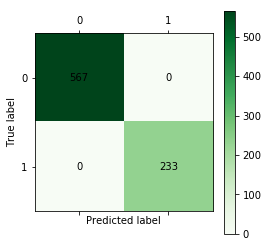

In [26]:
cm_plot(y_train,tree.predict(x_train)).show()

In [27]:
from sklearn.metrics import roc_curve

In [35]:
tree.predict_proba(x_test)[:,1]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [36]:
fpr, tpr, thresholds = roc_curve(y_test,tree.predict(x_test),pos_label=1)

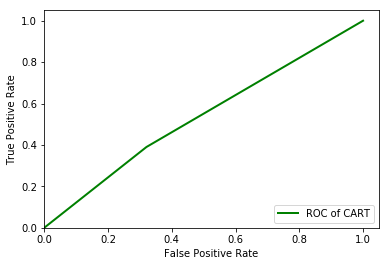

In [44]:
#做出roc曲线
plt.plot(fpr,tpr,linewidth=2,label= 'ROC of CART',color = 'green')
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4) #图例
plt.show() #显示作图结果

In [45]:
#训练KNN分类器
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
clf = KNeighborsClassifier(algorithm = 'kd_tree')
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
#测试结果
answer = clf.predict(x_test)

In [47]:
x_test

array([[  2.  ,  69.  ,  47.  , ...,   3.23,   5.07,   3.  ],
       [  1.  ,  16.  ,  24.  , ...,   2.24,   3.18,   3.  ],
       [  3.  ,  50.  ,  36.  , ...,   2.58,   3.66,   2.  ],
       ..., 
       [  2.  ,  23.  ,  22.  , ...,   2.07,   3.3 ,   3.  ],
       [  1.  ,  71.  ,  56.  , ...,   2.65,   5.14,   4.  ],
       [  2.  ,  72.  ,  53.  , ...,   3.77,   5.02,   4.  ]])

In [48]:
answer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
np.mean(answer==y_test)

0.755

In [51]:
#准确率
precision, recall, thresholds = precision_recall_curve(y_train,clf.predict(x_train))

In [52]:
precision

array([ 0.29125   ,  0.68617021,  1.        ])

In [53]:
recall

array([ 1.        ,  0.55364807,  0.        ])

In [54]:
thresholds

array([0, 1], dtype=int64)

In [55]:
classification_report(y_test, answer, target_names = ['高', '低'])

'             precision    recall  f1-score   support\n\n          高       0.84      0.85      0.85       159\n          低       0.40      0.39      0.40        41\n\navg / total       0.75      0.76      0.75       200\n'

In [56]:
#贝叶斯分类器
#训练
from sklearn.naive_bayes import BernoulliNB
clf =BernoulliNB()
clf.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
#测试结果
answer = 